In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start_date="2022-02-14"
end_date = "2023-02-14"

In [ ]:
msoft_data = yf.download("GOOGL", start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(msoft_data)

In [ ]:
msoft_data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
msoft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-02-14 to 2023-02-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
#Changes in individual Stock price overtime
msoft_data['Open'].plot(Label="Open Price",figsize=(15,7))
msoft_data['Close'].plot(Label="Close Price")
plt.ylabel('Price in $')
plt.xlabel('Days')
plt.show()

In [ ]:
msoft_data["Date"] = msoft_data.index
msoft_data= msoft_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

In [ ]:
msoft_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-02-14,2022-02-14,133.256500,136.300003,133.256500,135.526001,135.526001,34302000
2022-02-15,2022-02-15,137.570496,138.108505,135.821503,136.608505,136.608505,26680000
2022-02-16,2022-02-16,136.646500,138.085999,134.923996,137.738007,137.738007,25022000
2022-02-17,2022-02-17,136.242996,137.113495,132.478500,132.539001,132.539001,38950000
2022-02-18,2022-02-18,133.466995,134.070007,130.196503,130.403000,130.403000,45620000


In [ ]:
import plotly.express as px
figure = px.bar(msoft_data, x = "Date", y= "Close")
figure.show()

<ipython-input-30-1857f891ce79>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



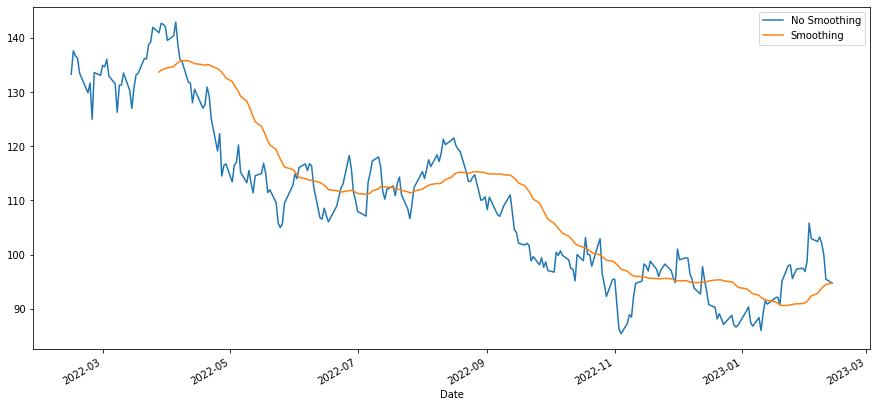

In [ ]:
msoft_data['Open'].plot(figsize=(15,7),label="No Smoothing")
msoft_data['Moving Average']=msoft_data['Open'].rolling(30).mean()
msoft_data['Moving Average'].plot(label="Smoothing")
plt.legend()
plt.show()

In [ ]:
msoft_data["Daily_return"]= msoft_data['Close']- msoft_data['Open']

<ipython-input-20-81017cdc67a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
msoft_data

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return
Date,,,,,,,,
2022-02-14,2022-02-14,133.256500,136.300003,133.256500,135.526001,135.526001,34302000,2.269501
2022-02-15,2022-02-15,137.570496,138.108505,135.821503,136.608505,136.608505,26680000,-0.961990
2022-02-16,2022-02-16,136.646500,138.085999,134.923996,137.738007,137.738007,25022000,1.091507
2022-02-17,2022-02-17,136.242996,137.113495,132.478500,132.539001,132.539001,38950000,-3.703995
2022-02-18,2022-02-18,133.466995,134.070007,130.196503,130.403000,130.403000,45620000,-3.063995
...,...,...,...,...,...,...,...,...
2023-02-07,2023-02-07,103.220001,108.180000,103.120003,107.639999,107.639999,49010200,4.419998
2023-02-08,2023-02-08,102.050003,103.139999,98.040001,99.370003,99.370003,94743500,-2.680000
2023-02-09,2023-02-09,100.000000,100.029999,93.629997,95.010002,95.010002,119455000,-4.989998


In [ ]:
import numpy as np

In [ ]:
msoft_data["Trends"] = np.where(msoft_data["Daily_return"]>=0,"Positive","Negative")

<ipython-input-25-7f64022fc0fa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
msoft_data

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trends
Date,,,,,,,,,
2022-02-14,2022-02-14,133.256500,136.300003,133.256500,135.526001,135.526001,34302000,2.269501,Positive
2022-02-15,2022-02-15,137.570496,138.108505,135.821503,136.608505,136.608505,26680000,-0.961990,Negative
2022-02-16,2022-02-16,136.646500,138.085999,134.923996,137.738007,137.738007,25022000,1.091507,Positive
2022-02-17,2022-02-17,136.242996,137.113495,132.478500,132.539001,132.539001,38950000,-3.703995,Negative
2022-02-18,2022-02-18,133.466995,134.070007,130.196503,130.403000,130.403000,45620000,-3.063995,Negative
...,...,...,...,...,...,...,...,...,...
2023-02-07,2023-02-07,103.220001,108.180000,103.120003,107.639999,107.639999,49010200,4.419998,Positive
2023-02-08,2023-02-08,102.050003,103.139999,98.040001,99.370003,99.370003,94743500,-2.680000,Negative
2023-02-09,2023-02-09,100.000000,100.029999,93.629997,95.010002,95.010002,119455000,-4.989998,Negative


Text(0.5, 1.0, 'Trend Frequency')

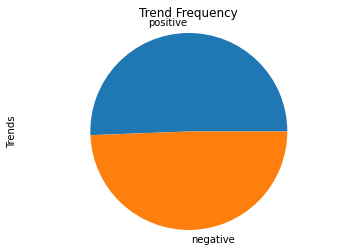

In [ ]:
msoft_data.Trends.value_counts().plot(kind='pie',labels=['positive','negative'])
plt.axis('equal')
plt.title('Trend Frequency')

In [ ]:
goog_data = yf.download('GOOGL', start=start_date , end=end_date)
amzn_data = yf.download('AMZN', start=start_date , end=end_date)
app_data = yf.download('AAPL', start=start_date , end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
goog_data['Daily_return'] = goog_data['Close']-goog_data['Open']
app_data['Daily_return'] = app_data['Close']-app_data['Open']
amzn_data['Daily_return'] = amzn_data['Close']-amzn_data['Open']


In [ ]:
correlation=pd.concat([msoft_data['Daily_return'],goog_data['Daily_return'],app_data['Daily_return'],amzn_data['Daily_return']],axis=1)
correlation.columns={"Microsoft","Google","Apple","Amazon"}
correlation

,Apple,Microsoft,Google,Amazon
Date,,,,
2022-02-14,2.269501,2.269501,1.510010,3.416000
2022-02-15,-0.961990,-0.961990,1.819992,-1.095001
2022-02-16,1.091507,1.091507,0.699997,2.309998
2022-02-17,-3.703995,-3.703995,-2.149994,-3.493500
2022-02-18,-3.063995,-3.063995,-2.520004,-2.897995
...,...,...,...,...
2023-02-07,4.419998,4.419998,4.009995,0.940002
2023-02-08,-2.680000,-2.680000,-1.960007,-1.989998
2023-02-09,-4.989998,-4.989998,-2.910004,-3.080002


In [ ]:
correlation.corr()

,Apple,Microsoft,Google,Amazon
Apple,1.000000,1.000000,0.797196,0.826736
Microsoft,1.000000,1.000000,0.797196,0.826736
Google,0.797196,0.797196,1.000000,0.780077
Amazon,0.826736,0.826736,0.780077,1.000000


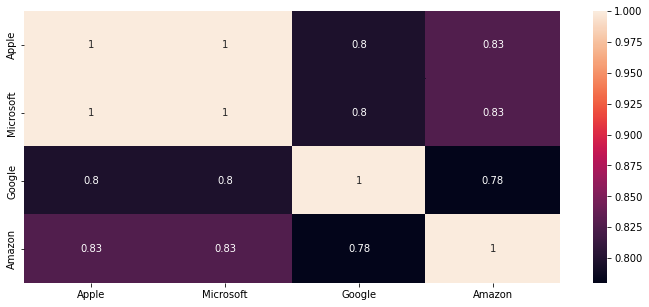

In [ ]:
import seaborn as sns
cor=correlation.corr()
plt.figure(figsize=(12,5))
sns.heatmap(data=cor,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c980af4f0>,
      dtype=object)

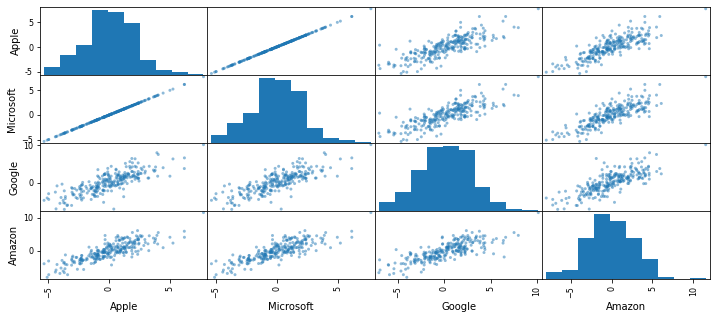

In [ ]:
from pandas.plotting import scatter_matrix as scx
scx(correlation,figsize=(12,5))